In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.graph_objects as go

In [3]:
table1 = pd.read_csv("data/test_users.csv")
table1

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,cv0na2lf5a,2014-09-30,20140930235232,NaN,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE
62092,zp8xfonng8,2014-09-30,20140930235306,NaN,-unknown-,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-
62093,fa6260ziny,2014-09-30,20140930235408,NaN,-unknown-,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox
62094,87k0fy4ugm,2014-09-30,20140930235430,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari


In [4]:
sessions = pd.read_csv("data/sessions.csv")
sessions

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
...,...,...,...,...,...,...
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


In [5]:
import pyspark
from pyspark import SparkContext
sc =SparkContext()

from pyspark.sql import Row
from pyspark.sql import SQLContext

In [6]:
sqlContext = SQLContext(sc)

In [29]:
from functools import reduce  # For Python 3.x
from pyspark.sql import DataFrame

def unionAll(*dfs):
    return reduce(DataFrame.unionAll, dfs)

In [36]:
df = sqlContext.read.format("csv").options(header="true", inferschema='true').load("data/train_users_2.csv")

In [35]:
dftrain
unionAll(dftrain, dftest).show()

DataFrame[id: string, date_account_created: timestamp, timestamp_first_active: bigint, date_first_booking: timestamp, gender: string, age: double, signup_method: string, signup_flow: int, language: string, affiliate_channel: string, affiliate_provider: string, first_affiliate_tracked: string, signup_app: string, first_device_type: string, first_browser: string, country_destination: string]

In [43]:
df = df.filter("age > 16 and age < 100")

In [8]:
dfSessions = sqlContext.read.format("csv").options(header="true", inferschema='true').load("data/sessions.csv")

In [9]:
dfSessions.groupBy("device_type").count().show()

+--------------------+-------+
|         device_type|  count|
+--------------------+-------+
|           iPodtouch|   8198|
|              iPhone|2105031|
|         Opera Phone|     68|
|     Windows Desktop|2658539|
|       Linux Desktop|  28373|
|       Android Phone| 839637|
|         Mac Desktop|3594286|
|Android App Unkno...| 273652|
|         iPad Tablet| 683414|
|          Blackberry|    979|
|       Windows Phone|   2047|
|           -unknown-| 211279|
|              Tablet| 139886|
|          Chromebook|  22348|
+--------------------+-------+



In [10]:
dfSessions.groupBy("user_id").count().show()

+----------+-----+
|   user_id|count|
+----------+-----+
|de3scomvop|    2|
|9nut71te0s|   60|
|zlv8f1qg2g|   68|
|srykgkylee|    3|
|funlgmcmr3|   11|
|mzduh7va3m|  171|
|zds4xn9jvb|   95|
|s5hieu20bh|   35|
|n2utn4z7pk|  102|
|e766mg6ku1|   10|
|xfpn2xw6b6|    5|
|thkobfxs30|   39|
|fvjgmiax3d|    9|
|2gv2kfvseu|   28|
|ott06joxd2|  138|
|e2zoe02zd5|   64|
|f0cnhta47g|  167|
|spv23uq1cb|  115|
|5ounyry4bv|   25|
|sl81fx9peb|    7|
+----------+-----+
only showing top 20 rows



In [37]:
df.groupBy("gender").count().show()

+---------+-----+
|   gender|count|
+---------+-----+
|     MALE|54440|
|    OTHER|  282|
|-unknown-|95688|
|   FEMALE|63041|
+---------+-----+



In [12]:
accountsCreated = df.groupBy("date_account_created").count().toPandas()
accountsCreated

,date_account_created,count
0,2011-06-03,21
1,2011-06-08,34
2,2011-10-08,43
3,2012-08-01,138
4,2013-03-31,111
...,...,...
1629,2012-07-04,115
1630,2012-10-31,133
1631,2012-10-12,104
1632,2014-05-13,674


In [44]:
left_join = df.join(dfSessions.groupBy("user_id").count(), df.id == dfSessions.groupBy("user_id").count().user_id,how='left').drop('user_id')

dashboardDf = dfSessions.filter(dfSessions.action == "dashboard").groupBy("user_id").agg({'secs_elapsed': 'avg'})
left_join = left_join.join(dashboardDf, left_join.id == dashboardDf.user_id, how='left')



left_join

DataFrame[id: string, date_account_created: timestamp, timestamp_first_active: bigint, date_first_booking: timestamp, gender: string, age: double, signup_method: string, signup_flow: int, language: string, affiliate_channel: string, affiliate_provider: string, first_affiliate_tracked: string, signup_app: string, first_device_type: string, first_browser: string, country_destination: string, count: bigint, user_id: string, avg(secs_elapsed): double]

In [45]:
left_join.toPandas()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,count,user_id,avg(secs_elapsed)
0,03c7ihv5r8,2014-05-07,20140507223046,NaT,MALE,47.0,facebook,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,NDF,31.0,03c7ihv5r8,138595.0
1,05xkkfxs5v,2014-04-06,20140406183244,NaT,MALE,26.0,facebook,0,en,remarketing,google,untracked,Web,Mac Desktop,Chrome,NDF,5.0,None,NaN
2,08bys9zpkj,2013-07-04,20130704223816,NaT,FEMALE,50.0,facebook,0,en,sem-non-brand,google,untracked,Web,Mac Desktop,Safari,NDF,NaN,None,NaN
3,09srme9etr,2013-10-08,20131008215443,NaT,MALE,41.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF,NaN,None,NaN
4,0aios9navj,2013-01-16,20130116014719,NaT,FEMALE,53.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Firefox,NDF,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122994,zsh61dfqqc,2014-06-15,20140615202850,2014-06-16,FEMALE,34.0,basic,0,en,sem-non-brand,google,untracked,Web,Windows Desktop,Chrome,US,45.0,None,NaN
122995,zu72r8gd21,2012-01-16,20120116180621,2013-01-07,FEMALE,60.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,US,NaN,None,NaN
122996,zwmviimtoq,2013-06-05,20130605182535,2013-06-06,FEMALE,30.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,US,NaN,None,NaN
122997,zx2yviqwkl,2013-01-11,20130111013858,NaT,FEMALE,47.0,facebook,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,NDF,NaN,None,NaN


In [46]:
pandasFrame = left_join.toPandas()

In [47]:
pandasFrame = pandasFrame[(pandasFrame.age<100) & (pandasFrame.age>16)]

In [48]:
pandasFrame

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,count,user_id,avg(secs_elapsed)
0,03c7ihv5r8,2014-05-07,20140507223046,NaT,MALE,47.0,facebook,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,NDF,31.0,03c7ihv5r8,138595.0
1,05xkkfxs5v,2014-04-06,20140406183244,NaT,MALE,26.0,facebook,0,en,remarketing,google,untracked,Web,Mac Desktop,Chrome,NDF,5.0,None,NaN
2,08bys9zpkj,2013-07-04,20130704223816,NaT,FEMALE,50.0,facebook,0,en,sem-non-brand,google,untracked,Web,Mac Desktop,Safari,NDF,NaN,None,NaN
3,09srme9etr,2013-10-08,20131008215443,NaT,MALE,41.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF,NaN,None,NaN
4,0aios9navj,2013-01-16,20130116014719,NaT,FEMALE,53.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Firefox,NDF,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122994,zsh61dfqqc,2014-06-15,20140615202850,2014-06-16,FEMALE,34.0,basic,0,en,sem-non-brand,google,untracked,Web,Windows Desktop,Chrome,US,45.0,None,NaN
122995,zu72r8gd21,2012-01-16,20120116180621,2013-01-07,FEMALE,60.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,US,NaN,None,NaN
122996,zwmviimtoq,2013-06-05,20130605182535,2013-06-06,FEMALE,30.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,US,NaN,None,NaN
122997,zx2yviqwkl,2013-01-11,20130111013858,NaT,FEMALE,47.0,facebook,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,NDF,NaN,None,NaN


In [17]:
# sns.set()
# sns.barplot(pandasFrame.gender.value_counts().index, pandasFrame.gender.value_counts().values).set(xlabel='Gender', ylabel='Amount of users')

In [18]:
fig = go.FigureWidget(data=go.Bar(x=pandasFrame.gender.value_counts().index,
            y=pandasFrame.gender.value_counts().values, marker={'color': pandasFrame.gender.value_counts().values, 'colorscale': 'RdBu'}))

fig.update_layout(
    title="Gender distribution users")
    
    
fig

FigureWidget({
    'data': [{'marker': {'color': array([56709, 49945, 16120,   225]),
                        …

In [19]:
# sns.barplot(pandasFrame.signup_app.value_counts().index, pandasFrame.signup_app.value_counts().values).set(xlabel='Origin', ylabel='Amount of users')

In [20]:
fig = go.FigureWidget(data=go.Bar(x=pandasFrame.signup_app.value_counts().index,
            y=pandasFrame.signup_app.value_counts().values, marker={'color': pandasFrame.signup_app.value_counts().values, 'colorscale': 'RdBu'}))

fig.update_layout(
    title="Signup platform users")

fig



FigureWidget({
    'data': [{'marker': {'color': array([108569,   9820,   2323,   2287]),
                    …

In [21]:
fig = go.FigureWidget(data=go.Bar(x=pandasFrame.language.value_counts().index,
            y=pandasFrame.language.value_counts().values, marker={'color': pandasFrame.language.value_counts().values, 'colorscale': 'RdBu'}))

fig.update_layout(
    title="Language users")

fig

FigureWidget({
    'data': [{'marker': {'color': array([118545,    908,    803,    633,    408,    397,    360…

Text(0.5, 1.0, 'Age distribution')

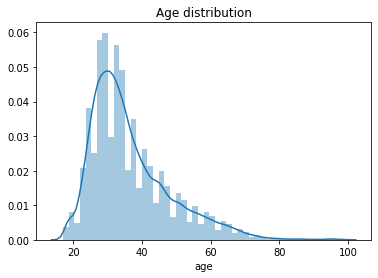

In [22]:
sns.distplot(pandasFrame.age).set_title('Age distribution')

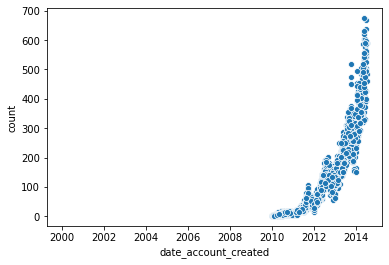

In [23]:
ax = sns.scatterplot(x="date_account_created", y="count", data=accountsCreated)

In [24]:
# import plotly.express as px
# import plotly.figure_factory as ff

# fig1=ff.create_distplot([pandasFrame.age], group_labels=["age"])

# fig = go.FigureWidget(fig1)
# fig


Text(0.5, 1.0, 'Average session time distribution')

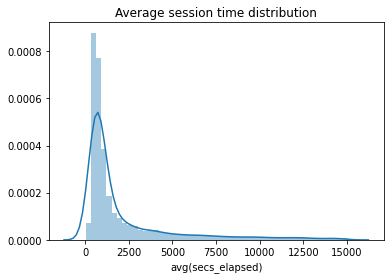

In [25]:
sns.distplot(pandasFrame['avg(secs_elapsed)'][pandasFrame['avg(secs_elapsed)']<15000]).set_title('Average session time distribution')

In [26]:
# Frame = pandasFrame['avg(secs_elapsed)'][pandasFrame['avg(secs_elapsed)']<15000]
# fig2=ff.create_distplot([Frame], group_labels = ["Average session time in seconds"])

# fig = go.FigureWidget(fig2)
# fig


Text(0.5, 1.0, 'Average number of sessions per user')

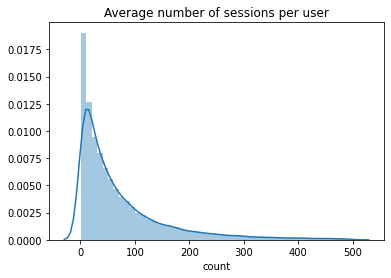

In [27]:
sns.distplot(pandasFrame['count'][pandasFrame['count']<500]).set_title('Average number of sessions per user')

In [28]:
# Frame = pandasFrame['count'][pandasFrame['count']<500]


# fig1=ff.create_distplot([Frame], group_labels=["Average amount of sessions"])

# fig = go.FigureWidget(fig1)
# fig
